In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from scipy.stats import uniform, randint
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

### Introduction ###
This notebook focuses on selecting and implementing a suitable ML model for prediction of firefighting resources based on historical data.

In [3]:
df = pd.read_csv("df_ready.csv")
df

,Region,Location Description,Incident Characterization,Total Fire Vehicles,Total Firefighting Personnel,Total Fireboats,Year,Month,Day of the Week,Hour
0,0,0,0,2.0,5.0,5.0,0,8,5,15
1,0,1,0,1.0,6.0,5.0,0,3,0,20
2,0,2,0,1.0,6.0,5.0,0,7,6,15
3,0,3,1,7.0,20.0,1.0,0,5,3,19
4,0,4,3,1.0,3.0,1.0,0,5,4,9
...,...,...,...,...,...,...,...,...,...,...
246328,50,2,0,1.0,2.0,0.0,10,6,3,21
246329,50,20,0,1.0,2.0,0.0,10,7,0,23
246330,50,2,0,2.0,4.0,0.0,10,8,2,18
246331,50,0,0,3.0,6.0,0.0,10,8,1,21


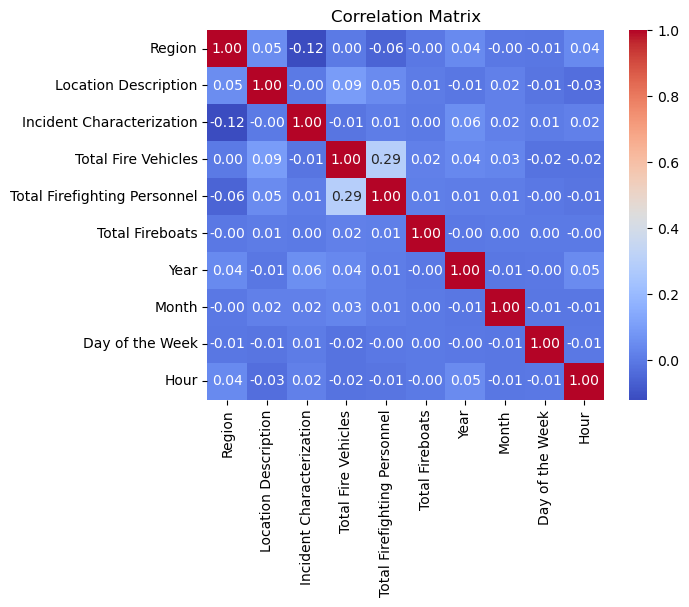

In [4]:
# correlation matrix
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Based on the above heatmap, it can be said that the variables are not highly correlated with each other. This information means all variables provide different information about the data.

In [5]:
# data standarization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Region,Location Description,Incident Characterization,Total Fire Vehicles,Total Firefighting Personnel,Total Fireboats,Year,Month,Day of the Week,Hour
0,-0.805413,-0.577115,-0.607559,0.303449,0.130182,34.107535,-2.019095,0.457505,0.945698,0.215492
1,-0.805413,-0.536489,-0.607559,-0.430246,0.286112,34.107535,-2.019095,-0.981166,-1.530510,1.002448
2,-0.805413,-0.495862,-0.607559,-0.430246,0.286112,34.107535,-2.019095,0.169771,1.440940,0.215492
3,-0.805413,-0.455235,0.178389,3.971923,2.469128,6.807987,-2.019095,-0.405698,-0.044785,0.845057
4,-0.805413,-0.414608,1.750287,-0.430246,-0.181677,6.807987,-2.019095,-0.405698,0.450457,-0.728855


In [6]:
y = df_scaled[['Total Fire Vehicles', 'Total Fireboats', 'Total Firefighting Personnel']]
X = df_scaled[['Region', 'Location Description', 'Incident Characterization', 'Year', 'Month', 'Day of the Week', 'Hour']]

In [7]:
# data split
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

To choose one model for further development of the prediction a few models with increasing complexity has been implemented. The implemented models have the minimum number of parameters for the simpilicity of the comparison.

In [8]:
# linear regression
linregr = LinearRegression()
linregr.fit(X_train, y_train)
y_pred = linregr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", linregr.score(X_test, y_test))


Mean Squared Error: 0.5726978672243388
R^2 Score: 0.009156312101469685


In [9]:
# ridge regression
ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3])
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error (Ridge):", mse_ridge)
print("R^2 Score (Ridge):", ridge.score(X_test, y_test))

Mean Squared Error (Ridge): 0.5726985854848193
R^2 Score (Ridge): 0.009155773436614814


In [10]:
# random forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train['Total Fire Vehicles'])
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test['Total Fire Vehicles'], y_pred_rf)
print("Mean Squared Error (Random Forest):", mse_rf)
print("R^2 Score (Random Forest):", rf.score(X_test, y_test['Total Fire Vehicles']))

Mean Squared Error (Random Forest): 0.6927739064666647
R^2 Score (Random Forest): 0.026211063965613346


In [11]:
# gradient boosting
gb = GradientBoostingRegressor(n_estimators=100, random_state=42, n_iter_no_change=5, validation_fraction=0.1)
gb.fit(X_train, y_train['Total Fire Vehicles'])
y_pred_gb = gb.predict(X_test)
mse_gb = mean_squared_error(y_test['Total Fire Vehicles'], y_pred_gb)
print("Mean Squared Error (Gradient Boosting):", mse_gb)
print("R^2 Score (Gradient Boosting):", gb.score(X_test, y_test['Total Fire Vehicles']))

Mean Squared Error (Gradient Boosting): 0.5351036822560882
R^2 Score (Gradient Boosting): 0.24783823329911725


In [12]:
# xgboost
xgb = XGBRegressor(n_estimators=50, random_state=42)
xgb.fit(X_train, y_train['Total Fire Vehicles'])
y_pred_xgb = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test['Total Fire Vehicles'], y_pred_xgb)
print("Mean Squared Error (XGBoost):", mse_xgb)
print("R^2 Score (XGBoost):", xgb.score(X_test, y_test['Total Fire Vehicles']))

Mean Squared Error (XGBoost): 0.5126664270124132
R^2 Score (XGBoost): 0.2793768791795703


In [13]:
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 50,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

The XGBoost model performs the best out of the five models above. However its performance is far from satisfying. To improve the results, we will continue with the tuning of paramaters to select the most optimal ones for the best performance.

## XGBoost ##

In [14]:
# sample dataset
sample_df = df_scaled.sample(n=50000, random_state=42)
sample_df.reset_index(drop=True, inplace=True)
sample_df

,Region,Location Description,Incident Characterization,Total Fire Vehicles,Total Firefighting Personnel,Total Fireboats,Year,Month,Day of the Week,Hour
0,-0.068384,-0.252101,1.750287,-0.430246,-0.181677,-0.016901,-1.328870,1.320708,-1.530510,-0.414072
1,-0.805413,-0.577115,-0.607559,-0.430246,-0.337607,-0.016901,-0.638645,1.608442,1.440940,0.530275
2,-0.202389,-0.414608,1.750287,-0.430246,-0.337607,-0.016901,-0.293532,1.608442,1.440940,-0.256681
3,-0.738411,-0.089594,-0.607559,0.303449,0.286112,-0.016901,0.051581,-0.405698,-0.044785,-1.987984
4,0.400634,-0.414608,1.750287,-0.430246,-0.337607,-0.016901,-0.983757,1.608442,-0.540027,0.530275
...,...,...,...,...,...,...,...,...,...,...
49995,-0.604405,-0.495862,-0.607559,3.238229,1.221690,-0.016901,0.741806,0.457505,-0.540027,-2.145375
49996,-0.805413,-0.414608,1.750287,0.303449,0.442042,-0.016901,0.051581,-0.405698,-0.044785,0.845057
49997,-0.738411,2.916789,1.750287,0.303449,0.286112,-0.016901,1.086918,0.457505,-1.035268,-0.414072
49998,0.869653,-0.292728,-0.607559,-0.430246,-0.181677,-0.016901,0.741806,-1.268901,1.440940,1.002448


In [56]:
y = sample_df[['Total Fire Vehicles','Total Firefighting Personnel', 'Total Fireboats', ]]
X = sample_df[['Region', 'Location Description', 'Incident Characterization', 'Year', 'Month', 'Day of the Week', 'Hour']]
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)  # 60% train, 20% val, 20% test

Hyperparameter tuning using **Randomized Search**

In [16]:
# parameters for random search
param_dist = {
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': randint(100, 400),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(1, 4)
}

In [17]:
def perform_random_search(param_dist, X_train, X_valid, y_train, y_valid, X_test, y_test, n_iter=30, random_state=42):
    """
    Perform Randomized Search for hyperparameter tuning and return results.

    Parameters:
        param_dist (dict): Dictionary of hyperparameter distributions.
        X_train, X_valid, y_train, y_valid, X_test, y_test: Split data for training, validation, and testing.
        n_iter (int): Number of iterations for RandomizedSearchCV.
        random_state (int): Random state for reproducibility.

    Returns:
        results_df (pd.DataFrame): DataFrame containing results of each iteration.
        best_model (pd.Series): Series containing the parameters of the best model.
    """
    results = []
    for i in range(n_iter):
        params = {key: (dist.rvs(random_state=i) if hasattr(dist, 'rvs') else np.random.choice(dist)) for key, dist in param_dist.items()}
        model = XGBRegressor(**params, objective='reg:squarederror', verbosity=0)
        model.fit(
            X_train, y_train,
            eval_set=[(X_valid, y_valid)],
            verbose=False
        )
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append({'iteration': i + 1, 'mse': mse, 'r2': r2, **params})

    results_df = pd.DataFrame(results)
    best_model = results_df.loc[results_df['mse'].idxmin()]
    return results_df, best_model

In [19]:
params = ['mse', 'r2', 'max_depth', 'min_child_weight', 'learning_rate', 'n_estimators', 'subsample', 'colsample_bytree', 'gamma', 'reg_alpha', 'reg_lambda']
param_values = {param: [] for param in params}

for i in range(10):
    results, best_model = perform_random_search(param_dist, X_train, X_valid, y_train, y_valid, X_test, y_test, n_iter=30, random_state=42)
    for param in params:
        param_values[param].append(best_model[param])

params_df = pd.DataFrame(param_values)

In [20]:
params_df

,mse,r2,max_depth,min_child_weight,learning_rate,n_estimators,subsample,colsample_bytree,gamma,reg_alpha,reg_lambda
0,0.373945,0.080539,5.0,7.0,0.05,292.0,0.984007,0.984007,0.480009,0.960017,4.840069
1,0.376292,0.062389,7.0,9.0,0.01,272.0,0.819525,0.819525,0.274407,0.548814,3.195254
2,0.375362,0.089444,3.0,7.0,0.05,207.0,0.805577,0.805577,0.256972,0.513943,3.055773
3,0.372813,0.098305,3.0,7.0,0.05,233.0,0.949372,0.949372,0.436715,0.873429,4.493718
4,0.375989,0.094640,3.0,5.0,0.05,345.0,0.939527,0.939527,0.424409,0.848818,4.395271
5,0.373402,0.096037,3.0,7.0,0.05,232.0,0.948050,0.948050,0.435062,0.870124,4.480497
6,0.375076,0.095428,3.0,5.0,0.05,137.0,0.766809,0.766809,0.208511,0.417022,2.668088
7,0.374899,0.077748,7.0,9.0,0.01,269.0,0.689316,0.689316,0.111646,0.223291,1.893164
8,0.374029,0.101858,3.0,1.0,0.05,222.0,0.986812,0.986812,0.483515,0.967030,4.868119
9,0.373787,0.072188,5.0,9.0,0.01,398.0,0.860150,0.860150,0.325187,0.650374,3.601497


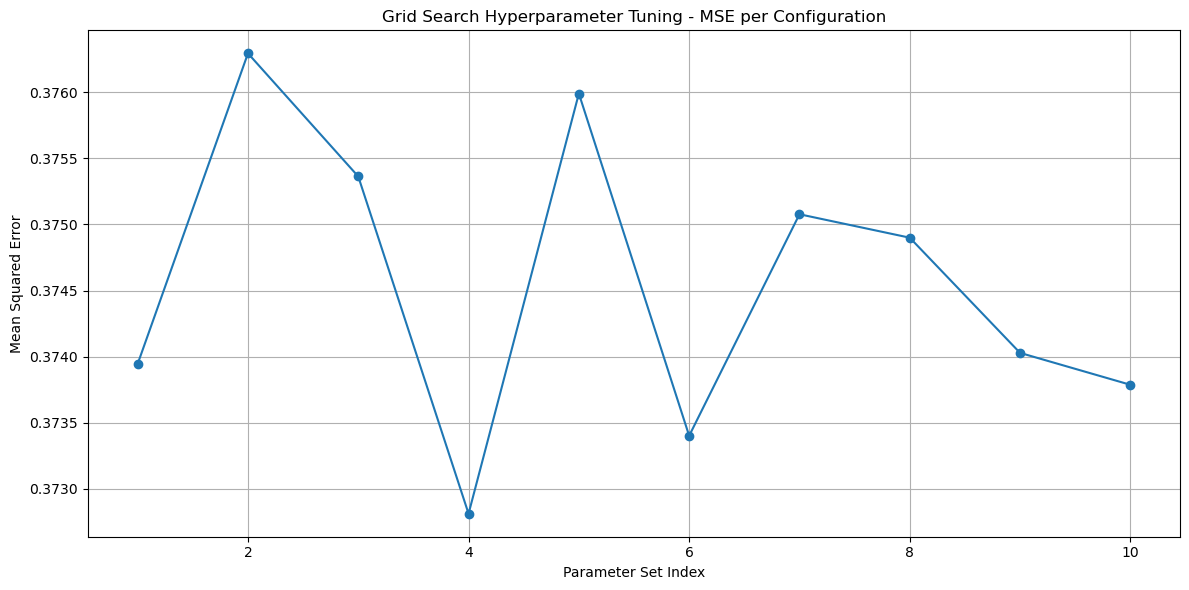

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(params_df) + 1), params_df['mse'], marker='o')
plt.title('Grid Search Hyperparameter Tuning - MSE per Configuration')
plt.xlabel('Parameter Set Index')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.tight_layout()
plt.show()

Best model

In [57]:
# fit model with best parameters
best_params = params_df.loc[params_df['mse'].idxmin()]

# Convert necessary parameters to integers
best_params['max_depth'] = int(best_params['max_depth'])
best_params['n_estimators'] = int(best_params['n_estimators'])

best_model = XGBRegressor(
	max_depth=int(best_params['max_depth']),
	n_estimators=int(best_params['n_estimators']),
	min_child_weight=best_params['min_child_weight'],
	learning_rate=best_params['learning_rate'],
	subsample=best_params['subsample'],
	colsample_bytree=best_params['colsample_bytree'],
	gamma=best_params['gamma'],
	reg_alpha=best_params['reg_alpha'],
	reg_lambda=best_params['reg_lambda'],
	objective='reg:squarederror',
	verbosity=0
)
best_model.fit(X_train, y_train[['Total Fire Vehicles', 'Total Firefighting Personnel', 'Total Fireboats']], eval_set=[(X_valid, y_valid[['Total Fire Vehicles', 'Total Firefighting Personnel', 'Total Fireboats']])], verbose=False)
y_pred_best = best_model.predict(X_test)

In [58]:
y_pred_best

array([[-0.28693646, -0.24670236, -0.01216837],
       [-0.16797616, -0.1733706 , -0.01597628],
       [-0.16783904, -0.11825219, -0.01429642],
       ...,
       [ 0.00247881,  0.04770721, -0.00298603],
       [ 0.58703625,  0.06053748, -0.00441898],
       [-0.37329748, -0.26799846, -0.0605063 ]],
      shape=(10000, 3), dtype=float32)

In [59]:
# descale the predictions
placeholder = np.zeros((y_pred_best.shape[0], df_scaled.shape[1]))  # Create a placeholder array
placeholder[:, :y_pred_best.shape[1]] = y_pred_best  # Replace the first columns with predictions
y_pred_best_descaled = scaler.inverse_transform(placeholder)[:, :y_pred_best.shape[1]]  # Inverse transform and extract the descaled predictions

# round the predictions
y_pred_best_descaled = np.round(y_pred_best_descaled).astype(int)
y_pred_best_descaled[:100] 


array([[ 8,  8,  1],
       [10, 10,  1],
       [10, 11,  1],
       [15, 21,  1],
       [12, 15,  1],
       [12, 11,  1],
       [ 4,  6,  1],
       [10, 16,  1],
       [11, 11,  1],
       [ 8, 13,  1],
       [40, 38,  1],
       [14, 20,  1],
       [15, 20,  1],
       [13, 15,  1],
       [ 7,  9,  1],
       [ 6, 11,  1],
       [13, 15,  1],
       [ 9, 16,  1],
       [13, 15,  1],
       [15, 12,  1],
       [27, 25,  1],
       [10, 10,  1],
       [ 6,  7,  1],
       [12, 16,  1],
       [15, 21,  1],
       [13, 12,  1],
       [11, 14,  1],
       [13, 11,  1],
       [ 8, 10,  1],
       [ 9, 13,  1],
       [14, 17,  1],
       [12, 16,  1],
       [14, 12,  1],
       [ 9,  9,  1],
       [12, 13,  1],
       [11, 10,  1],
       [ 6,  8,  1],
       [11, 16,  1],
       [15, 18,  1],
       [27, 31,  1],
       [14, 19,  1],
       [22, 16,  1],
       [27, 24,  1],
       [16, 20,  1],
       [12, 19,  1],
       [11, 12,  1],
       [18, 16,  1],
       [10, 1

In [60]:
# output
output_forecast = y_pred_best_descaled
output_forecast

array([[ 8,  8,  1],
       [10, 10,  1],
       [10, 11,  1],
       ...,
       [12, 15,  1],
       [21, 16,  1],
       [ 6,  8,  1]], shape=(10000, 3))